In [1]:
# Benchmarking PBMC dataset with simulated CNVs
# - CD14 monocytes: Chr6 loss, Chr22 loss
# - CD4 T cells: ChrX gain

adfile_path = "/Users/pythonpete/Downloads/CSCB-2025-Final/data/nico_annotated.h5ad"

In [2]:
from cscb_methods import *

In [3]:
# Read file
adata = sc.read_h5ad(adfile_path)

In [4]:
#adata.var["start"] = np.NAN
#adata.var["end"] = np.NAN
#adata.var["chromosome"] = np.NAN
adata.var.columns = ["gene_ids"] + list(adata.var.columns[1:])
adata.var

,gene_ids,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm
RP11-34P13.7,ENSG00000238009,False,False,8,0.001168,99.883161,8,8,False,0.001005,0.106106,-0.425783
FO538757.2,ENSG00000279457,False,False,1682,0.290638,75.434497,1990,1650,False,0.242928,0.240822,0.141101
AP006222.2,ENSG00000228463,False,False,1014,0.164598,85.190594,1127,998,False,0.143834,0.203599,-0.015533
RP4-669L17.2,ENSG00000236601,False,False,7,0.001022,99.897765,7,6,False,0.000729,-0.045706,-1.064601
RP4-669L17.10,ENSG00000237094,False,False,43,0.006280,99.371988,43,42,False,0.005446,0.050701,-0.658924
...,...,...,...,...,...,...,...,...,...,...,...,...
AL592183.1,ENSG00000273748,False,False,5,0.000730,99.926975,5,5,False,0.000804,0.361150,0.647438
AC007325.4,ENSG00000278817,False,False,117,0.017234,98.291222,118,116,False,0.016699,0.211654,0.018362
AC007325.2,ENSG00000277196,False,False,75,0.011100,98.904630,76,72,False,0.008735,0.053963,-0.645196
AC004556.1,ENSG00000276345,False,False,2627,0.551482,61.632832,3776,2598,False,0.384800,0.121034,-0.897212


In [5]:
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,n_genes,n_counts,leiden,celltype
barcode,,,,,,,,,,
AAACCTGAGCGTAATA-1,2947,12299,384,3.122205,4947,40.222782,2947,12299,1,hESC-EB
AAACCTGAGTTCGATC-1,3685,21024,987,4.694635,10278,48.886986,3685,21024,0,hESC-EB
AAACCTGCAAAGGAAG-1,2153,8038,171,2.127395,3300,41.054989,2153,8038,0,hESC-EB
AAACCTGCATAGAAAC-1,2456,9230,141,1.527627,3826,41.451788,2456,9230,0,hESC-EB
AAACCTGCATTTGCCC-1,2478,9326,218,2.337551,4042,43.341197,2478,9326,0,hESC-EB
...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTTCCGGCA-1,4060,21423,609,2.842739,8682,40.526537,4060,21423,1,hESC-EB
TTTGTCATCATATCGG-1,2363,11233,327,2.911066,5250,46.737292,2363,11233,1,hESC-EB
TTTGTCATCCTAGTGA-1,1887,6832,98,1.434426,2997,43.867096,1887,6832,0,hESC-EB


In [6]:
ref = "/Users/pythonpete/Downloads/PBMC_simulated_cnas_041025.h5ad"
ref_ad = sc.read_h5ad(ref)
ref_ad

AnnData object with n_obs × n_vars = 10309 × 20104
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'n_counts', 'cell_type', 'simulated_cnvs'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'chromosome', 'start', 'end', 'strand'
    layers: 'counts'

In [7]:
merge_gene_positions(adata, ref_ad)
adata.var

,gene_ids,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm,chromosome,start,end,strand
0,ENSG00000238009,False,False,8,0.001168,99.883161,8,8,False,0.001005,0.106106,-0.425783,NaN,NaN,NaN,NaN
1,ENSG00000279457,False,False,1682,0.290638,75.434497,1990,1650,False,0.242928,0.240822,0.141101,NaN,NaN,NaN,NaN
2,ENSG00000228463,False,False,1014,0.164598,85.190594,1127,998,False,0.143834,0.203599,-0.015533,NaN,NaN,NaN,NaN
3,ENSG00000236601,False,False,7,0.001022,99.897765,7,6,False,0.000729,-0.045706,-1.064601,NaN,NaN,NaN,NaN
4,ENSG00000237094,False,False,43,0.006280,99.371988,43,42,False,0.005446,0.050701,-0.658924,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20122,ENSG00000273748,False,False,5,0.000730,99.926975,5,5,False,0.000804,0.361150,0.647438,GL000219.1,54224.0,83311.0,-1.0
20123,ENSG00000278817,False,False,117,0.017234,98.291222,118,116,False,0.016699,0.211654,0.018362,KI270734.1,131494.0,137392.0,1.0
20124,ENSG00000277196,False,False,75,0.011100,98.904630,76,72,False,0.008735,0.053963,-0.645196,NaN,NaN,NaN,NaN
20125,ENSG00000276345,False,False,2627,0.551482,61.632832,3776,2598,False,0.384800,0.121034,-0.897212,NaN,NaN,NaN,NaN


In [8]:
# Ensure that chromosomes are of the form 'chr#' and exclude any other chromosomes
adata = standardize_chromosomes(adata)

In [9]:
# Run if needed:
# adata = qc(adata)
# adata = downsample(adata,n_cells=2000)

In [10]:
# Normalize, do not log transform before CopyKAT GMM clustering
# adata.layers['counts'] = adata.X.copy()
# sc.pp.normalize_total(adata, target_sum=1e4)

In [11]:
# find HVGs for UMAP plots
# sc.pp.highly_variable_genes(adata, min_mean=0.125, max_mean=6, min_disp=0.25)

In [12]:
# CopyKAT GMM clustering for automatic detection of diploid reference/normal cells vs aneuploid cells
diploid_pred,labels=identify_diploid_cells_high_precision(adata,window=10,n_components=3,primary_trim_percentile=100,secondary_trim_percentile=10)

adata.obs['predicted_diploid'] = diploid_pred
adata.obs['gmm_cluster'] = labels.astype(str)

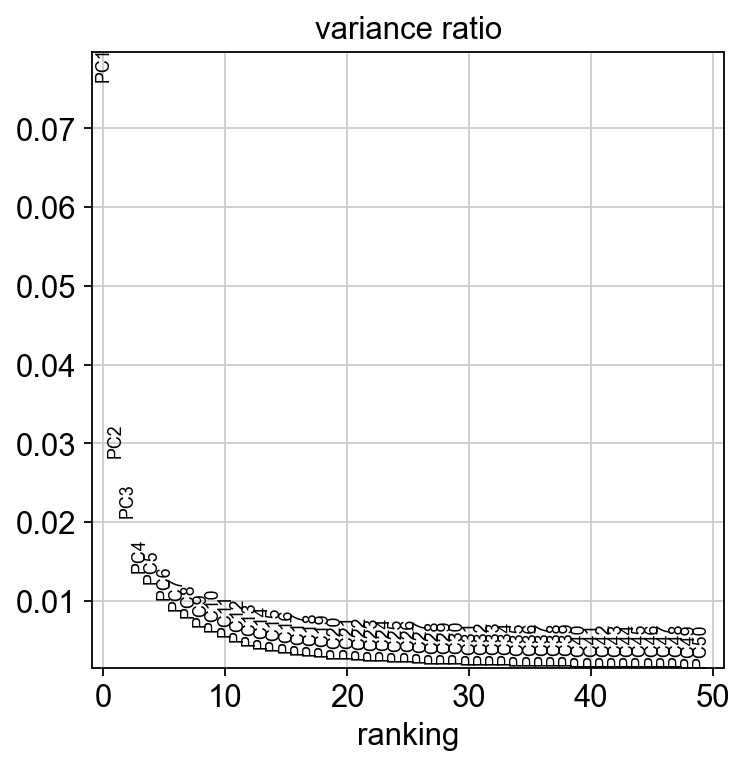

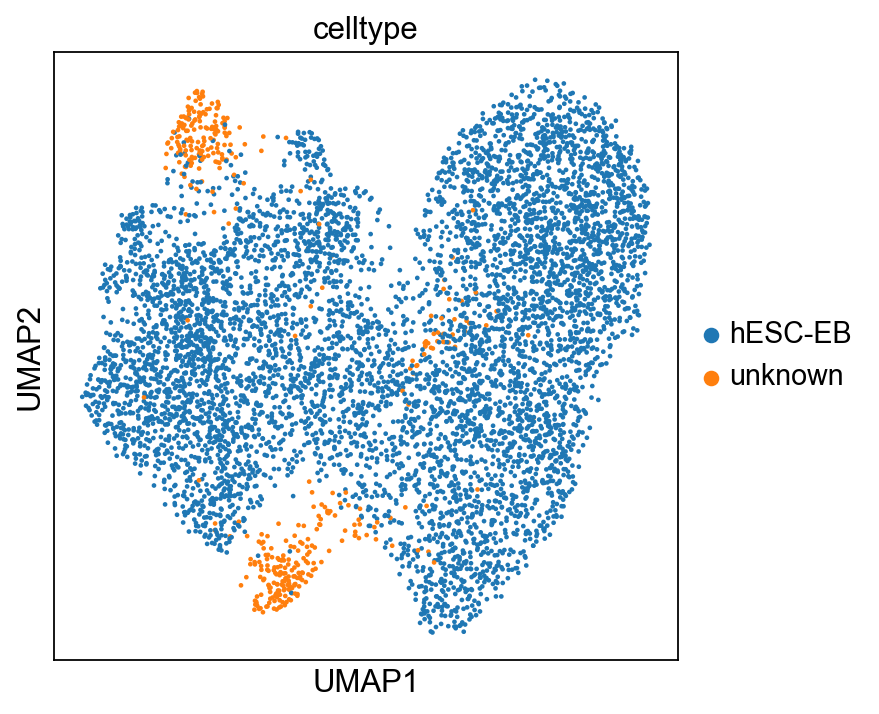

In [13]:
# PCA and KNN for UMAP plots
sc.tl.pca(adata, use_highly_variable=True)
sc.pl.pca_variance_ratio(adata,50)

sc.pp.neighbors(adata,n_neighbors=20,n_pcs=10)
sc.tl.umap(adata)
sc.pl.umap(adata, color='celltype')

In [14]:
# Quick run of InferCNVpy for Leiden clustering by CNV score
reference_key = 'predicted_diploid'
reference_cat = ['diploid']

cnv.tl.infercnv(adata,reference_key=reference_key,reference_cat=reference_cat,
                exclude_chromosomes=None,chunksize=5000,calculate_gene_values=False,
                window_size=100,step=10,dynamic_threshold=1.5)

  0%|          | 0/2 [00:00<?, ?it/s]

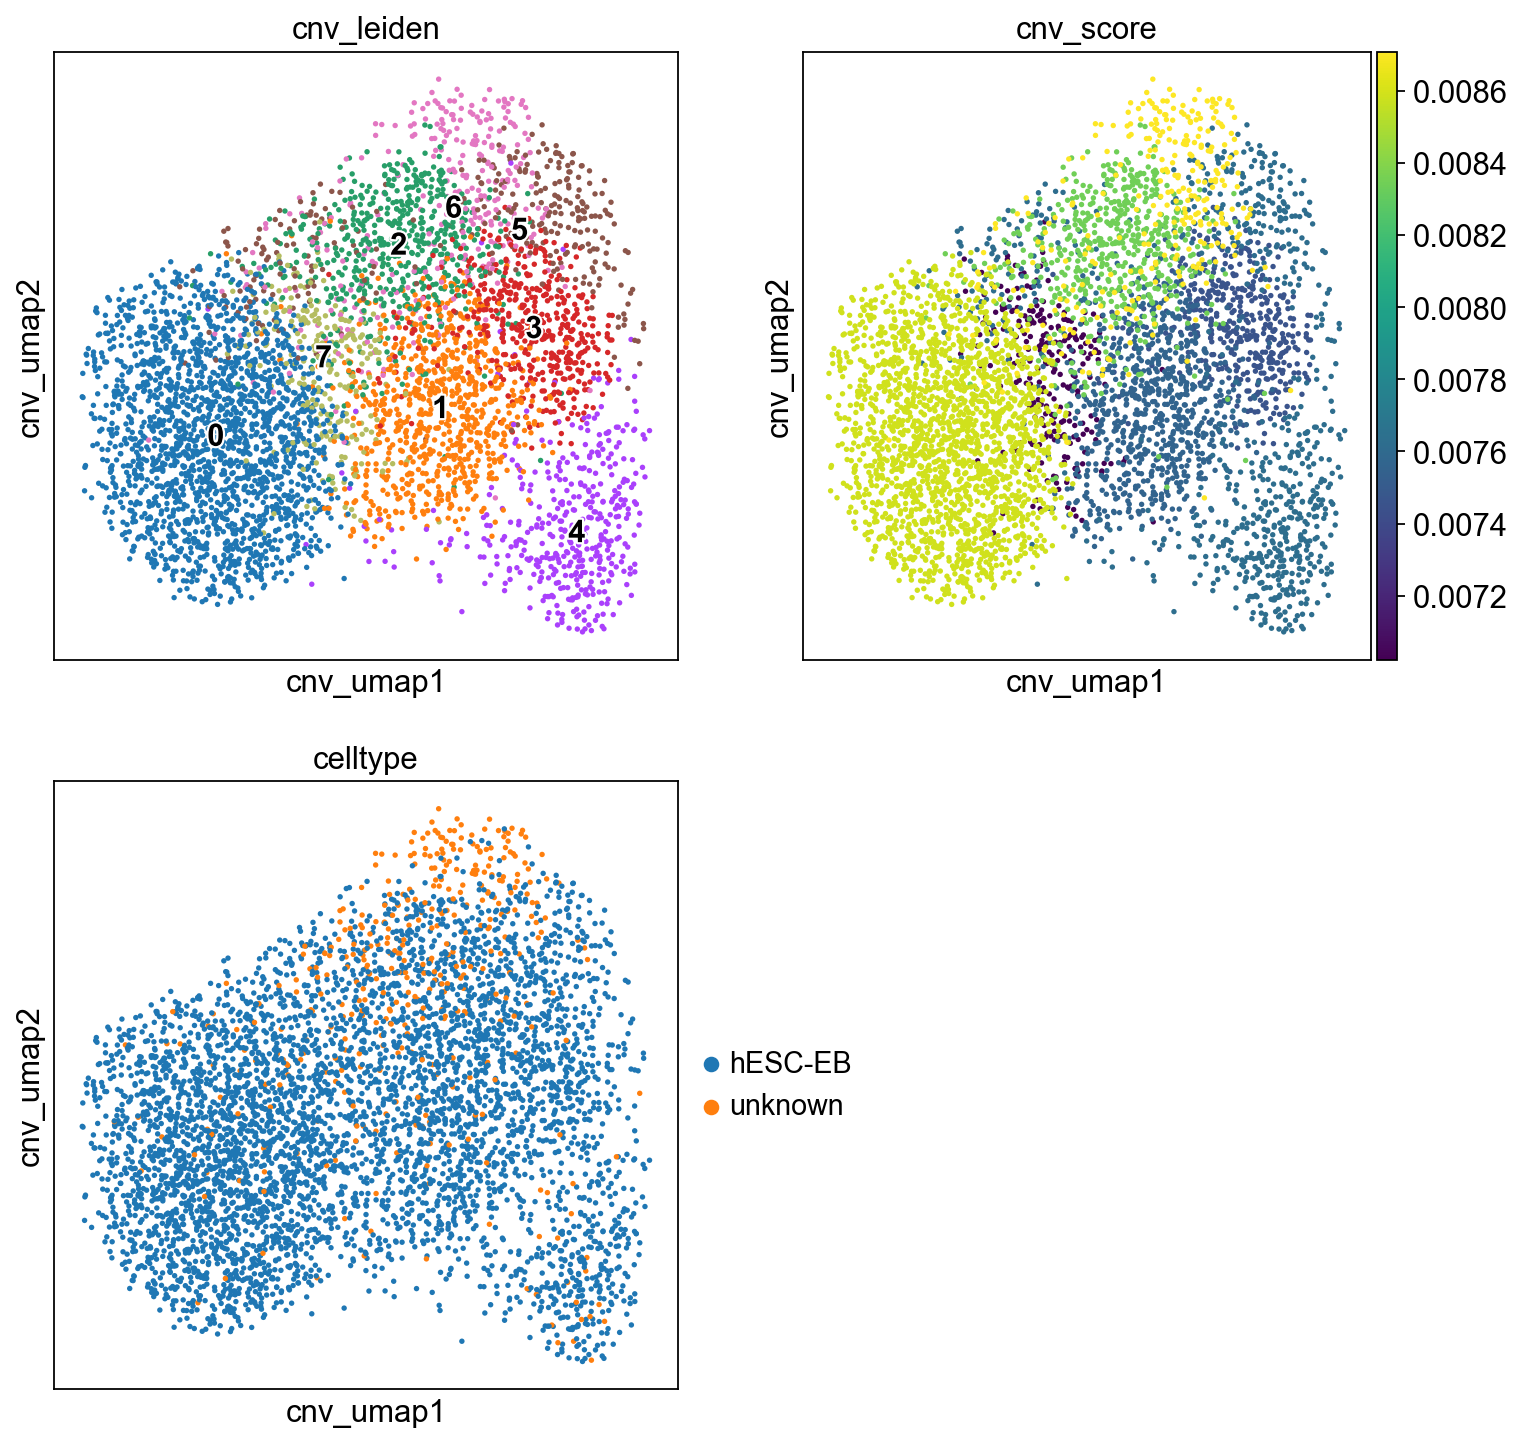

In [15]:
# Plot
plot_aneuploid_cnv_clusters(adata,diploid_annotation='predicted_diploid')

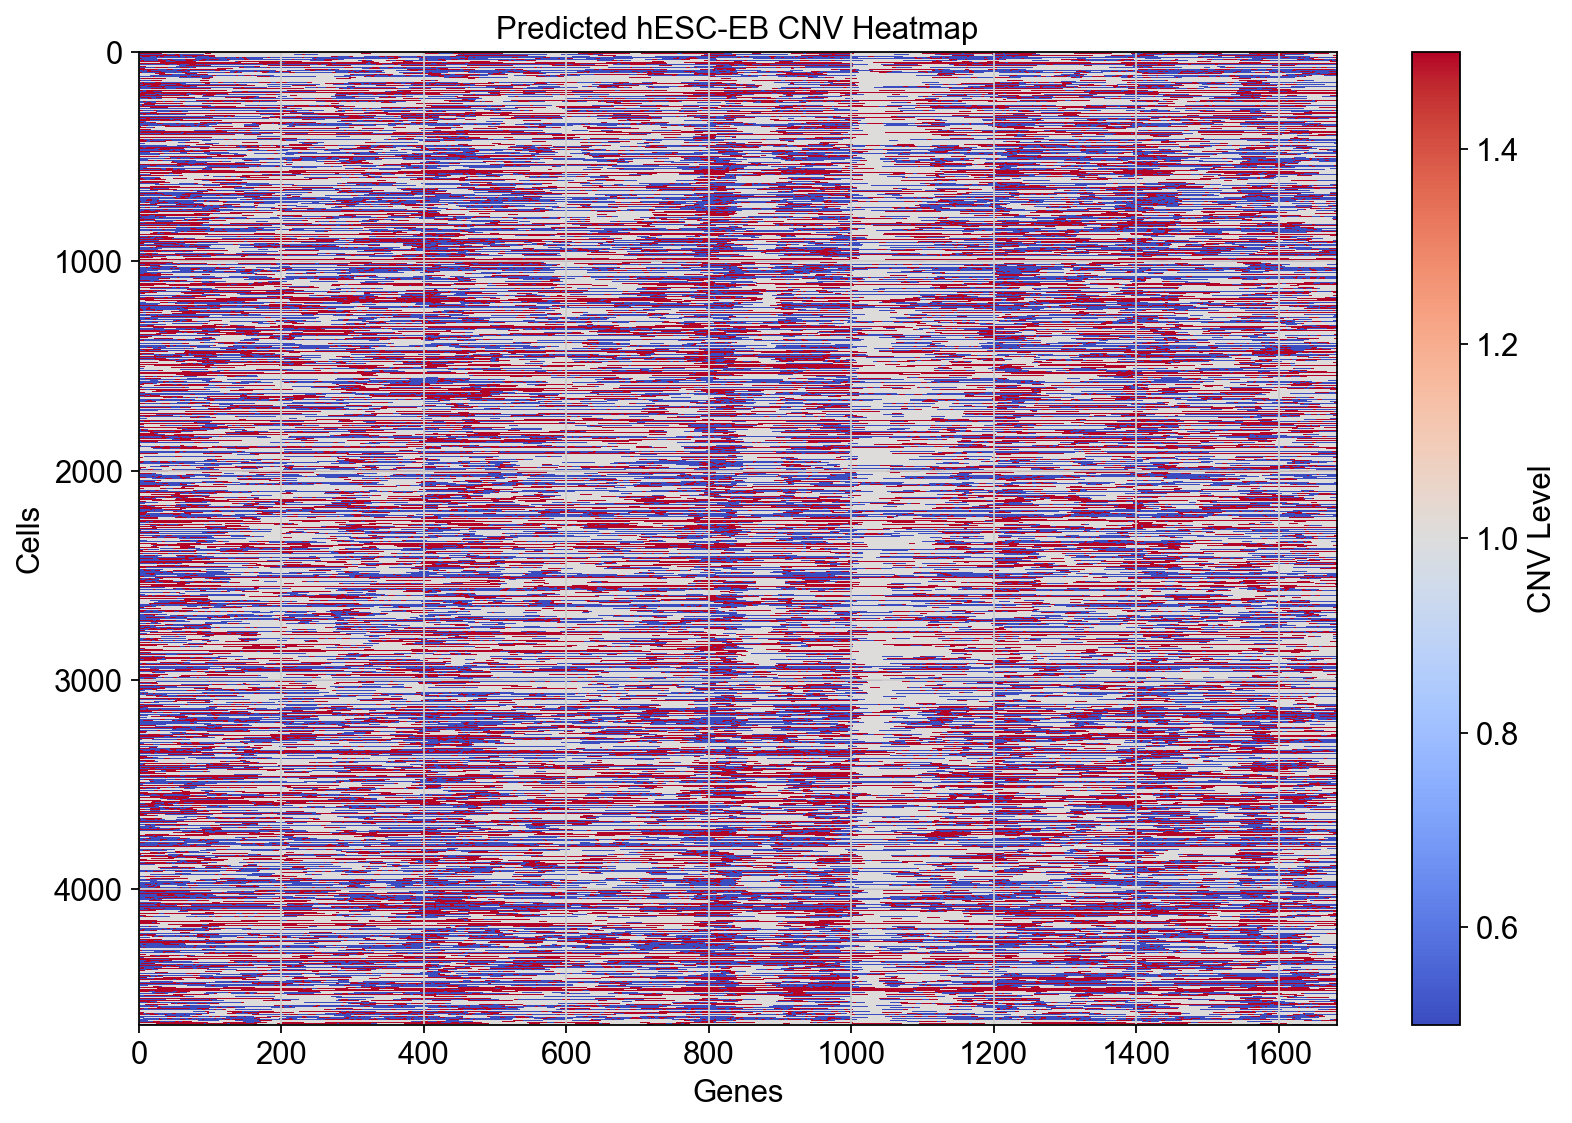

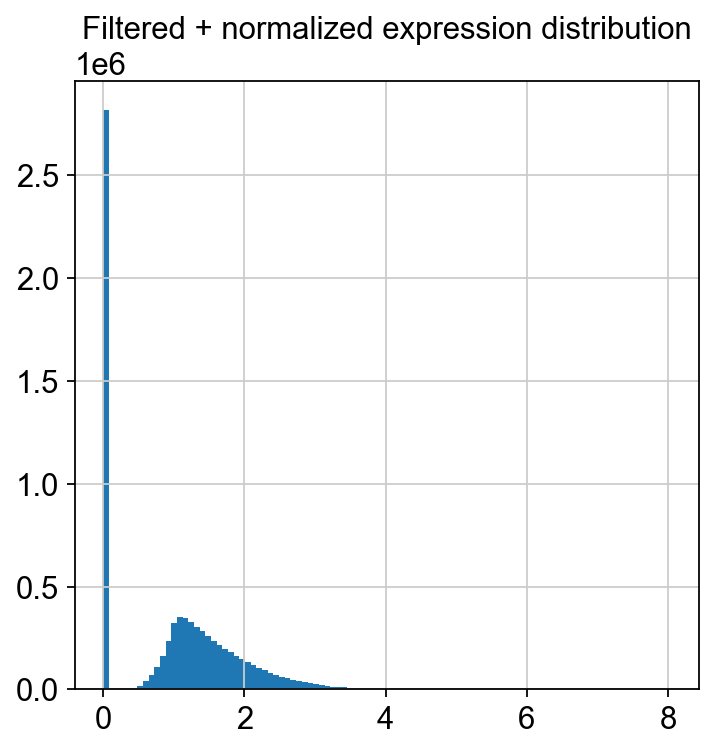

In [18]:
adata_hesceb = i3_hmm_infercnv(adata,cell_type='hESC-EB',cell_annotation='celltype',diploid_annotation='predicted_diploid',logFC_threshold=0.5,plots=True)

In [19]:
adata_hesceb.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,n_genes,n_counts,leiden,celltype,predicted_diploid,gmm_cluster,hmm_cnv_score,hmm_cnv
barcode,,,,,,,,,,,,,,
AAACCTGAGTTCGATC-1,3685,21024,987,4.694635,10278,48.886986,3685,21024,0,hESC-EB,aneuploid,1,0.995244,
AAACCTGCATAGAAAC-1,2456,9230,141,1.527627,3826,41.451788,2456,9230,0,hESC-EB,aneuploid,1,0.939358,chr1:944203.0-39034636.0 (loss)
AAACCTGCATTTGCCC-1,2478,9326,218,2.337551,4042,43.341197,2478,9326,0,hESC-EB,aneuploid,1,0.980380,
AAACCTGGTCGTGGCT-1,1878,6116,51,0.833878,2634,43.067364,1878,6116,0,hESC-EB,aneuploid,1,0.781510,chr1:944203.0-45618904.0 (loss)
AAACCTGTCATATCGG-1,2387,9376,311,3.316980,3947,42.096843,2387,9376,0,hESC-EB,aneuploid,1,0.951843,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGTGGGCTA-1,2123,7241,168,2.320122,3090,42.673664,2123,7241,0,hESC-EB,aneuploid,1,0.890904,chr1:944203.0-32818031.0 (loss)
TTTGTCACAATGGTCT-1,1922,6318,111,1.756885,2396,37.923393,1922,6318,0,hESC-EB,aneuploid,1,0.869501,chr2:24067586.0-149026759.0 (loss)
TTTGTCACAGACTCGC-1,2835,11190,400,3.574620,4768,42.609473,2835,11190,0,hESC-EB,aneuploid,1,0.972652,


In [20]:
# Update new CNV information back into original adata
adata.obs.loc[adata_hesceb.obs_names,'hmm_cnv'] = adata_hesceb.obs['hmm_cnv']
adata.obs['hmm_cnv'].fillna('', inplace=True)
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,n_genes,n_counts,leiden,celltype,predicted_diploid,gmm_cluster,hmm_cnv
barcode,,,,,,,,,,,,,
AAACCTGAGCGTAATA-1,2947,12299,384,3.122205,4947,40.222782,2947,12299,1,hESC-EB,diploid,2,
AAACCTGAGTTCGATC-1,3685,21024,987,4.694635,10278,48.886986,3685,21024,0,hESC-EB,aneuploid,1,
AAACCTGCAAAGGAAG-1,2153,8038,171,2.127395,3300,41.054989,2153,8038,0,hESC-EB,diploid,2,
AAACCTGCATAGAAAC-1,2456,9230,141,1.527627,3826,41.451788,2456,9230,0,hESC-EB,aneuploid,1,chr1:944203.0-39034636.0 (loss)
AAACCTGCATTTGCCC-1,2478,9326,218,2.337551,4042,43.341197,2478,9326,0,hESC-EB,aneuploid,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTTCCGGCA-1,4060,21423,609,2.842739,8682,40.526537,4060,21423,1,hESC-EB,diploid,2,
TTTGTCATCATATCGG-1,2363,11233,327,2.911066,5250,46.737292,2363,11233,1,hESC-EB,aneuploid,0,
TTTGTCATCCTAGTGA-1,1887,6832,98,1.434426,2997,43.867096,1887,6832,0,hESC-EB,diploid,1,


In [22]:
# Get top 10 most common CNVs
top_cnvs = adata.obs['hmm_cnv'].value_counts().head(10)
print("Top 10 most common CNVs:\n")
print(top_cnvs)

print("\nFraction of iPSC vs HSPC cells for each top CNV:\n")

# For each CNV, calculate fraction of iPSC and HSPC cells
for cnv in top_cnvs.index:
    subset = adata.obs[adata.obs['hmm_cnv'] == cnv]
    total = len(subset)

    ipsc_count = (subset['celltype'] == 'hESC-EB').sum()

    ipsc_frac = ipsc_count / total if total else 0

    print(f"{cnv}:")
    print(f"  iPSC: {ipsc_count} cells ({ipsc_frac:.2%})")


Top 10 most common CNVs:

hmm_cnv
                                    2956
chr1:944203.0-244864560.0 (gain)     124
chr1:944203.0-42676758.0 (loss)       27
chr1:944203.0-70253052.0 (loss)       26
chr1:944203.0-36397908.0 (loss)       26
chr1:944203.0-53238518.0 (loss)       25
chr1:944203.0-45570049.0 (loss)       24
chr1:944203.0-39034636.0 (loss)       24
chr1:944203.0-40072649.0 (loss)       24
chr1:944203.0-40097260.0 (loss)       23
Name: count, dtype: int64

Fraction of iPSC vs HSPC cells for each top CNV:

:
  iPSC: 2545 cells (86.10%)
chr1:944203.0-244864560.0 (gain):
  iPSC: 124 cells (100.00%)
chr1:944203.0-42676758.0 (loss):
  iPSC: 27 cells (100.00%)
chr1:944203.0-70253052.0 (loss):
  iPSC: 26 cells (100.00%)
chr1:944203.0-36397908.0 (loss):
  iPSC: 26 cells (100.00%)
chr1:944203.0-53238518.0 (loss):
  iPSC: 25 cells (100.00%)
chr1:944203.0-45570049.0 (loss):
  iPSC: 24 cells (100.00%)
chr1:944203.0-39034636.0 (loss):
  iPSC: 24 cells (100.00%)
chr1:944203.0-40072649.0 (l

In [23]:
adata.obs["hmm_cnv"].astype(bool).sum()

3791

In [ ]:
# Because chromosome location and genomic regions are almost all wrong
# We will focus on whether we were able to detect in a cell a CNV and its type (gain or loss) correctly
assess_predicted_cnvs(adata,prediction_annotation='hmm_cnv',truth_annotation='simulated_cnvs')

Precision: 0.5733788395904437
Recall: 0.27199136535348084
Accuracy: 0.7888548683404777
F1 score: 0.3689604685212299
